In [15]:
import torch

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [16]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
plt.rcParams["figure.figsize"] = (15,9)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

seed = 0

# Data Preprocessing

In [17]:
def standardize_data_formats(df):
    df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m/%d')
    df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')
    return df


def merge_dataframes(df1, df2):
    df1['Date'] = pd.to_datetime(df1['Date'], format='%d-%m-%Y')
    df2['Date'] = pd.to_datetime(df2['Date'], format='%d-%m-%Y')
    df = pd.merge(df1, df2, on='Date', how='outer')
    return df

In [18]:
df_85_22 = pd.read_csv('data/daily_gold_rates_85-22.csv')
df_96_23 = pd.read_csv('data/daily_gold_rates_96-23.csv')

df_85_22 = standardize_data_formats(df_85_22)

df = merge_dataframes(df_85_22, df_96_23)

In [19]:
df = df.sort_values(by='Date')
df = df.dropna()
df = df[['Date', 'Open', 'High', 'Low', 'Close', 'WAP', 'No. of Shares', 'No. of Trades', 'Total Turnover',
         'Deliverable Quantity', '% Deli. Qty to Traded Qty', 'Spread H-L', 'Spread C-O', 'USD', 'EUR', 
         'GBP', 'INR', 'AED', 'CNY']]

df.to_csv('data/daily_gold_rates.csv', index=False)

In [20]:
df = pd.read_csv("data/daily_gold_rates.csv")

In [21]:
df.head(15)

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O,USD,EUR,GBP,INR,AED,CNY
0,2004-06-14,7.90,7.90,7.50,7.61,7.695057,26300.0,151.0,202380.0,3050.0,11.60,0.40,-0.29,385.10,318.67,211.88,17454.65,1414.47,3187.28
1,2004-06-15,6.75,7.30,6.75,7.02,7.157005,26547.0,254.0,189997.0,12290.0,46.30,0.55,0.27,386.50,320.02,212.45,17527.77,1419.61,3198.91
2,2004-06-16,7.10,7.22,6.94,7.02,7.035025,39400.0,128.0,277180.0,20900.0,53.05,0.28,-0.08,385.25,320.79,210.84,17459.53,1415.06,3188.52
3,2004-06-17,7.00,7.20,6.95,7.11,7.039955,26955.0,129.0,189762.0,10705.0,39.71,0.25,0.11,386.10,320.81,210.63,17548.24,1418.18,3195.56
4,2004-06-18,7.30,7.30,7.15,7.23,7.231038,26355.0,130.0,190574.0,2055.0,7.80,0.15,-0.07,395.10,325.84,214.93,18020.50,1451.20,3270.04
5,2004-06-21,7.10,8.00,7.00,7.65,7.626774,46800.0,189.0,356933.0,32150.0,68.70,1.00,0.55,395.25,326.83,216.00,18130.12,1451.75,3271.29
6,2004-06-22,7.70,7.70,7.20,7.50,7.501782,67350.0,171.0,505245.0,53100.0,78.84,0.50,-0.20,395.75,327.30,217.40,18283.65,1453.59,3275.58
7,2004-06-23,7.21,7.25,6.75,6.82,6.976971,36302.0,179.0,253278.0,28751.0,79.20,0.50,-0.39,393.90,325.79,216.51,17991.37,1446.83,3260.23
8,2004-06-24,7.05,7.11,6.92,7.00,7.036007,28800.0,70.0,202637.0,27600.0,95.83,0.19,-0.05,400.00,328.47,219.66,18330.00,1469.20,3310.60
9,2004-06-25,6.90,7.24,6.80,7.20,7.060620,27400.0,153.0,193461.0,2300.0,8.39,0.44,0.30,401.50,330.79,220.45,18374.65,1474.71,3323.09


C:\Users\mello\AppData\Local\Temp\ipykernel_20036\1639180983.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = df.corr().round(3)


<Axes: >

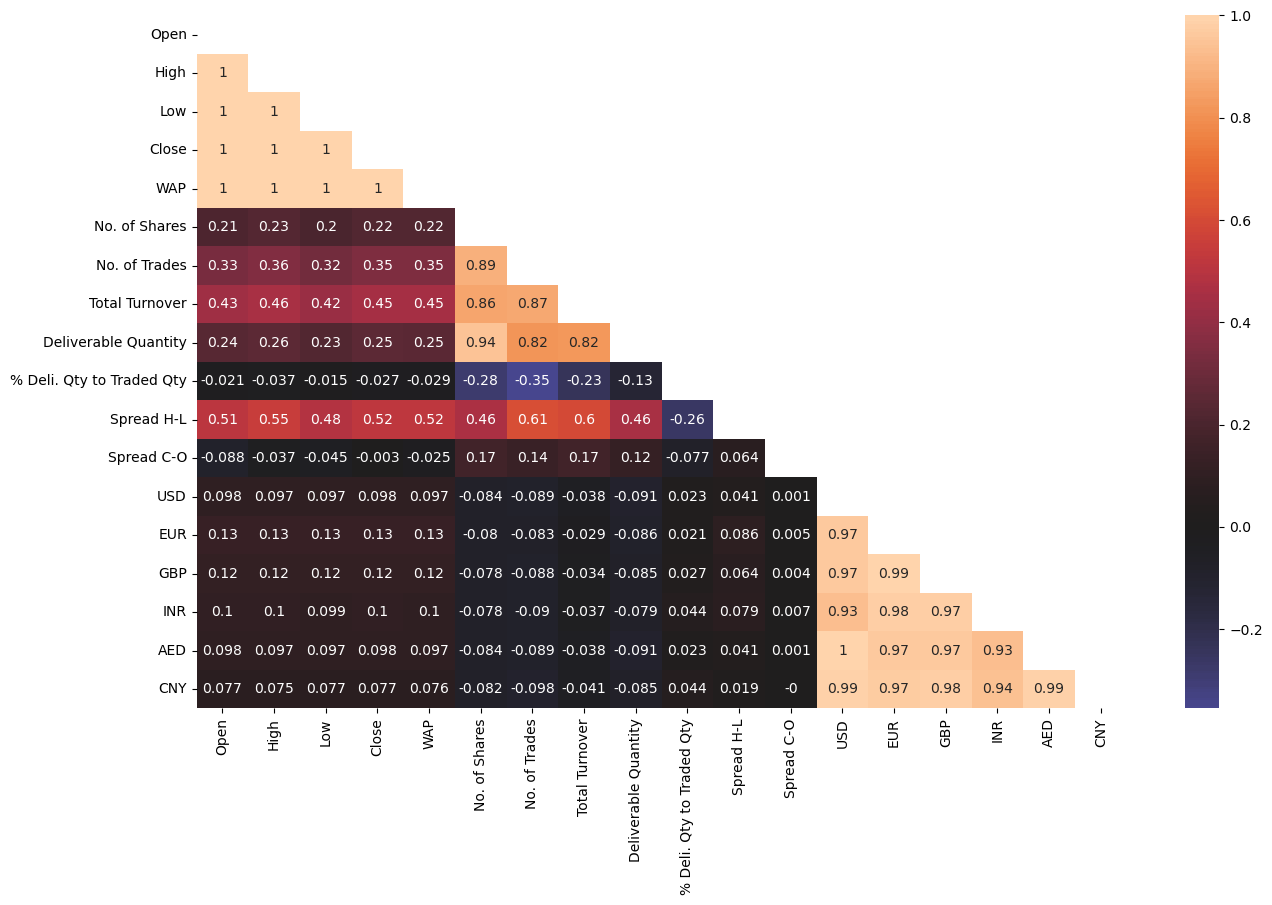

In [23]:
matrix = df.corr().round(3)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, center=0, mask=mask)

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df_pca = df.drop('Date', axis=1) # Data minus datatimes
x = StandardScaler().fit_transform(df_pca)

pca_data = PCA(n_components = 5)
pcaData = pca_data.fit_transform(x)

In [28]:
pca_df = pd.DataFrame(data=pcaData, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
pca_df.head(15)